In [ ]:
!pip install ultralytics
!pip install roboflow matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.4/870.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from IPython import display
import matplotlib.pyplot as plt
import os
import cv2
from roboflow import Roboflow
import glob
from IPython.display import Image, display
from google.colab import files

In [ ]:
# display.clear_output()
!yolo mode=checks

In [ ]:
!yolo task=detect mode=predict model=yolov8m.pt conf=0.25 data={image_dir}/data.yaml source="/content/Hard-Hat-Sample-3/test/images/000008_jpg.rf.dab1eb7417a4cb0e3ccd36c38ef9aa9a.jpg"

Ultralytics 8.3.10 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8m summary (fused): 218 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs

image 1/1 /content/Hard-Hat-Sample-3/test/images/000008_jpg.rf.dab1eb7417a4cb0e3ccd36c38ef9aa9a.jpg: 640x640 6 persons, 1 sports ball, 1742.9ms
Speed: 5.1ms preprocess, 1742.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model=yolov8m.pt conf=0.25 data={image_dir}/data.yaml source="/content/Turtle-1/test/images/turtle_1001_png.rf.6715fcd6261c8aa98373b441ef124014.jpg"

Ultralytics 8.3.10 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8m summary (fused): 218 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs

image 1/1 /content/Turtle-1/test/images/turtle_1001_png.rf.6715fcd6261c8aa98373b441ef124014.jpg: 384x640 1 person, 1 baseball glove, 954.8ms
Speed: 2.9ms preprocess, 954.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
# Initialize Roboflow with your API key
rf = Roboflow(api_key="oO7M6O03cXw3x36PVBxq")  # Replace with your actual API key

# Access the existing project
project = rf.workspace("geckos-land").project("hard-hat-sample-5adtr")  # Replace with your project name

# Download the dataset (specify the version you want)
dataset = project.version(3).download("yolov11") # Adjust version number as needed

# Path to the images
image_dir = dataset.location


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Hard-Hat-Sample-3 in yolov11:: 100%|██████████| 492/492 [00:00<00:00, 4193.10it/s]


In [ ]:
# Initialize Roboflow with your API key
rf = Roboflow(api_key="oO7M6O03cXw3x36PVBxq")  # Replace with your actual API key

# Access the existing project
project = rf.workspace("geckos-land").project("turtle-yoyfj-xo29r")  # Replace with your project name

# Download the dataset (specify the version you want)
dataset = project.version(1).download("yolov11") # Adjust version number as needed

# Path to the images
image_dir = dataset.location

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
print(image_dir)

/content/Turtle-1


In [ ]:
# Set the path to the specific image subdirectory
test_image_dir = os.path.join(image_dir, 'test')  # Change 'test' to 'train' or 'valid' if needed

# List all files in the test image directory
images = os.listdir(test_image_dir)

# Filter to include only image files (e.g., .jpg, .png)
image_files = [img for img in images if img.endswith(('.jpg', '.png', '.jpeg'))]

# Display some images
num_images_to_display = 5  # Number of images to display

for i in range(min(num_images_to_display, len(image_files))):
    img_path = os.path.join(test_image_dir, image_files[i])
    img = cv2.imread(img_path)

    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Image: {image_files[i]}")
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print(f"Could not read image: {img_path}")

In [ ]:
# Set the path to the specific image subdirectory
image_dir = 'content/runs/detect/predict'  # Change to your desired base path

# Use glob to list all jpg files in the specified directory
image_path_pattern = os.path.join(image_dir, '*.jpg')
image_files = glob.glob(image_path_pattern)

# Display some images
num_images_to_display = 5  # Number of images to display

for i in range(min(num_images_to_display, len(image_files))):
    img_path = image_files[i]
    img = cv2.imread(img_path)

    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Image: {os.path.basename(img_path)}")
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print(f"Could not read image: {img_path}")


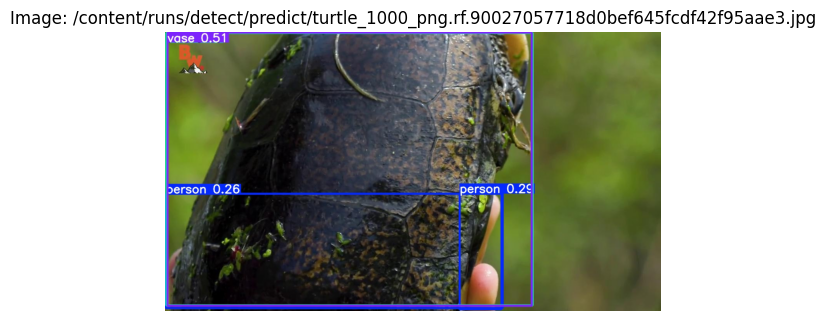

In [ ]:
import os
import glob
import cv2
import matplotlib.pyplot as plt

# Set the path to the specific image subdirectory
image_dir = '/content/runs/detect/predict/'  # Change to your desired base path

# Use glob to list all jpg files in the specified directory
image_path_pattern = os.path.join(image_dir, '*.jpg')
image_files = glob.glob(image_path_pattern)

# Display some images
num_images_to_display = 5  # Number of images to display

for i in range(min(num_images_to_display, len(image_files))):
    img_path = image_files[i]
    img = cv2.imread(img_path)

    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Image: {img_path}")  # Show the full image path
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print(f"Could not read image: {img_path}")


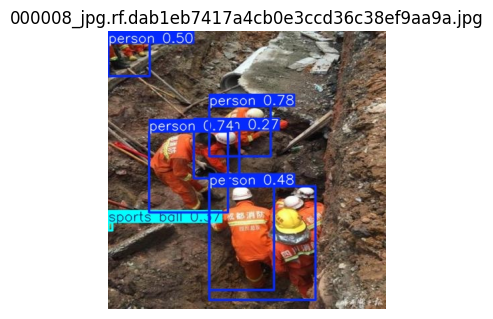

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2

# Set the directory path
directory_path = '/content/runs/detect/predict4/'

# List all files in the directory
files = os.listdir(directory_path)

# Filter for image files (you can add more formats if needed)
image_files = [f for f in files if f.endswith(('.jpg', '.jpeg', '.png'))]

# Create a subplot for each image
plt.figure(figsize=(15, 15))
for i, image_file in enumerate(image_files):
    # Load the image
    image_path = os.path.join(directory_path, image_file)
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a subplot
    plt.subplot(5, 5, i + 1)  # Adjust the number of rows/columns as needed
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title(image_file)  # Optional: Show the filename as title

plt.tight_layout()
plt.show()


# Avance de la Semana 2

## Asignación:
Miguel Andrés Realpe Robalino: "Esta semana crea un dataset de iguanas. Para eso usa como base videos de dron que estan en la GPU de cidis. El acceso de anydesk es [privado]. Los videos estan em D:\Videos dron GALAPAGOS\Avistamiento Macrofauna Dron. Busca en los videos escenas que esten viendo directamente hacia abajo y selecciona unos 20 frames tratando de tener variedad de escenas (arena, roca, etc.). Crea un proyecto en roboflow y etiqueta con poligonos las iguanas en los frames y de alli crea un dataset."

## Resumen General
- Breve descripción de lo que se logró esta semana.

## Tareas Completadas
- [x] Crear Dataset de Iguanas
- [ ] Entrenar modelos con el Dataset

## Desafíos Enfrentados
- Hacen falta muchas más imágenes de Iguanas y animales en general. La mayoría de los videos son vistas aéreas muy alejadas con el dron. Como mucho sirve para el uso de suelo. Ataje este problema aumentando la data.

## Próximos Pasos
- Investigar sobre los distintos tipos de proyectos: Object detection, classification, instance segmentation, keypoint detection. Modelos más complejos y uso de suelo.


In [ ]:
rf = Roboflow(api_key="oO7M6O03cXw3x36PVBxq")
project = rf.workspace("geckos-land").project("galapagos-oxbrc")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Galapagos-1 in yolov11:: 100%|██████████| 12/12 [00:00<00:00, 2478.54it/s]


In [ ]:
labeled_images_dir = '/content/Galapagos-1/train/images'
labels_dir = '/content/Galapagos-1/train/labels'

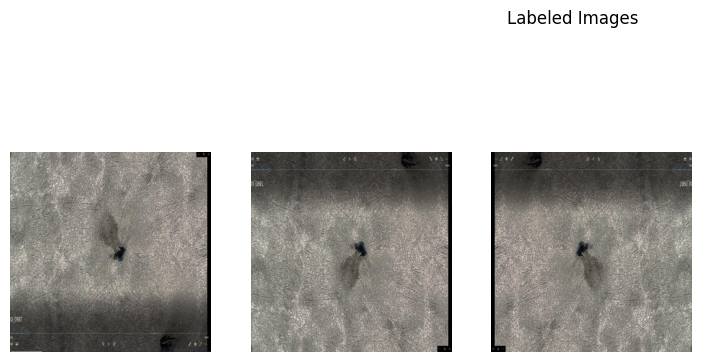

In [ ]:
def display_images(image_paths, title, num_images=5):
    plt.figure(figsize=(15, 5))
    for i, image_path in enumerate(image_paths[:num_images]):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Get the image paths
labeled_images = [os.path.join(labeled_images_dir, img) for img in os.listdir(labeled_images_dir)]
unlabeled_images = [os.path.join(unlabeled_images_dir, img) for img in os.listdir(unlabeled_images_dir)]

# Display images
display_images(labeled_images, 'Labeled Images')


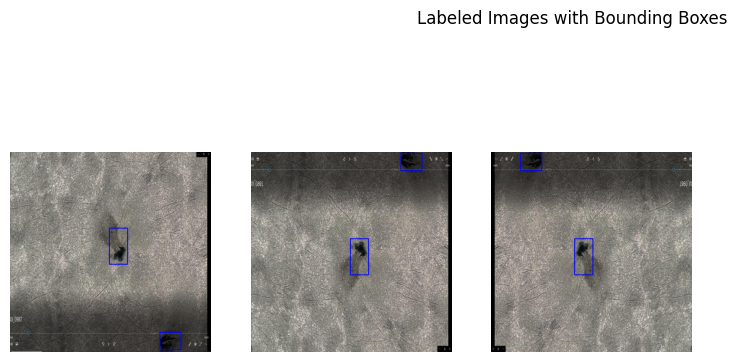

In [ ]:
def draw_bounding_boxes(image_path, label_path):
    img = cv2.imread(image_path)
    height, width, _ = img.shape

    with open(label_path, 'r') as f:
        for line in f.readlines():
            class_id, x_center, y_center, w, h = map(float, line.strip().split())
            # Convert YOLO format to pixel values
            x_center_pixel = int(x_center * width)
            y_center_pixel = int(y_center * height)
            w_pixel = int(w * width)
            h_pixel = int(h * height)

            # Calculate top-left corner coordinates
            x1 = int(x_center_pixel - (w_pixel / 2))
            y1 = int(y_center_pixel - (h_pixel / 2))
            x2 = int(x_center_pixel + (w_pixel / 2))
            y2 = int(y_center_pixel + (h_pixel / 2))

            # Draw the bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue box

    return img

def display_images_with_boxes(image_paths, label_paths, num_images=5):
    plt.figure(figsize=(15, 5))

    # Create a list from the zip object
    image_label_pairs = list(zip(image_paths, label_paths))

    for i, (image_path, label_path) in enumerate(image_label_pairs[:num_images]):
        img_with_boxes = draw_bounding_boxes(image_path, label_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.suptitle('Labeled Images with Bounding Boxes')
    plt.show()

# Display images with bounding boxes
display_images_with_boxes(labeled_images, labels)
